# Palmers Penguins 
***
This notebook contains my analysis of the famous palmer penguins dataset.
The data set is available [on GitHub](https://allisonhorst.github.io/palmerpenguins/)


## Background of the Palmer Penguins dataset 
***
The Palmer Penguins dataset, orginally created to study Antarctic penguins’ foraging behavior and relationship with environmental variability, is a commonly used dataset for data exploration and visualization.

The dataset was collected by [Dr.Kristen Gorman](https://www.uaf.edu/cfos/people/faculty/detail/kristen-gorman.php) with  the [Palmer Station, Antarctica, Long-Term Ecological Research program](https://pallter.marine.rutgers.edu/).

The dataset tracks three species of penguin across three Antartic islands measuring different attributes of the penguin i.e. flipper length, body mass, sex and bill length and depth.

##### Species:
|Adelie    |Gentoo | Chinstrap|
|-----------|---------------|------------|
|![Adelie](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e3/Hope_Bay-2016-Trinity_Peninsula%E2%80%93Ad%C3%A9lie_penguin_%28Pygoscelis_adeliae%29_04.jpg/173px-Hope_Bay-2016-Trinity_Peninsula%E2%80%93Ad%C3%A9lie_penguin_%28Pygoscelis_adeliae%29_04.jpg)|![Gentoo](https://upload.wikimedia.org/wikipedia/commons/thumb/3/32/Gentoo_Penguin_Baby_%2824940372635%29.jpg/209px-Gentoo_Penguin_Baby_%2824940372635%29.jpg)|![Chinstrap](https://upload.wikimedia.org/wikipedia/commons/thumb/0/08/South_Shetland-2016-Deception_Island%E2%80%93Chinstrap_penguin_%28Pygoscelis_antarctica%29_04.jpg/160px-South_Shetland-2016-Deception_Island%E2%80%93Chinstrap_penguin_%28Pygoscelis_antarctica%29_04.jpg)|

The version of the dataset used in this project focuses on a reduced amount of variables from the original dataset, including:
   - Species of penguin
   - Island the penguin was located on
   - Bill length and depth (mm)
   - Flipper length (mm)
   - Body mass (g)
   - Sex of the penguin

##### Suggestion for data types to be used in python for each of the variables
Of the columns in the dataset 3 are text based (Species of penguin, island and sex) so here the data type string would be fitting.

The remaining columns are numerical values (Bill length, bill depth, flipper length and body mass).

For bill length and bill depth we can see decimal values in the dataset, with this the suggestion for the data type to be used for those fields would be float so that python could handle the decimal places.

Flipper length and body mass appear to be whole numbers in the dataset, with this these values don't have the restriction of needing decimal places to be considered with the numbers as they are present in the dataset and so technically int could be used.
Since we may wish to do some equations using the different values in the dataset as the project progresses the suggestion would be for the data type float to also be used here. This would also be a benefit as it would be more consistent to use the same data type across the numeric values.

## Libaries used
***

In [123]:
# Importing required libaries from python
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [124]:
# Loading the penguins data set using the raw data link from github
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

In [138]:
#Take a look at the different variables in the dataset and display the data type for each
# Get unique data types in each column
data_types = df.dtypes

# Print the variables along with their data types
print("Variables in the dataset:")
for column in df.columns:
    print(f"\nVariable: {column}")
    print(f"Data type: {data_types[column]}")


Variables in the dataset:

Variable: species
Data type: object

Variable: island
Data type: object

Variable: bill_length_mm
Data type: float64

Variable: bill_depth_mm
Data type: float64

Variable: flipper_length_mm
Data type: float64

Variable: body_mass_g
Data type: float64

Variable: sex
Data type: object


In [126]:
# Setting the different filters of the dataset which will be used in the project

# Filter the data based on the sex
female_df = df[df['sex'] == 'FEMALE']
male_df = df[df['sex'] == 'MALE']

# Filter the dataset based on location
torgersen_df = df[df['island'] == 'Torgersen']
biscoe_df = df[df['island'] == 'Biscoe']
dream_df = df[df['island'] == 'Dream']

# Filter the data based on the species
adelie_data = df[df['species'] == 'Adelie']
gentoo_data = df[df['species'] == 'Gentoo']
chinstrap_data = df[df['species'] == 'Chinstrap']


In [127]:
# Taking a quick look at the data to see number of each species per island
print(f'Torgerson island is home to {torgersen_df["species"].value_counts()}')
print(f'\nBiscoe island is home to {biscoe_df["species"].value_counts()}')
print(f'\nDream island is home to {dream_df["species"].value_counts()}')

Torgerson island is home to species
Adelie    52
Name: count, dtype: int64

Biscoe island is home to species
Gentoo    124
Adelie     44
Name: count, dtype: int64

Dream island is home to species
Chinstrap    68
Adelie       56
Name: count, dtype: int64


#### Table view of the number of each species per island

|    |Torgerson island|Biscoe island|Dream island|
|-----------|---------------:|------------:|------------:|
|Adelie     |            52|         44|56|
|Chinstrap  |            0|         0|68|
|Gentoo     |            0|         124|0|


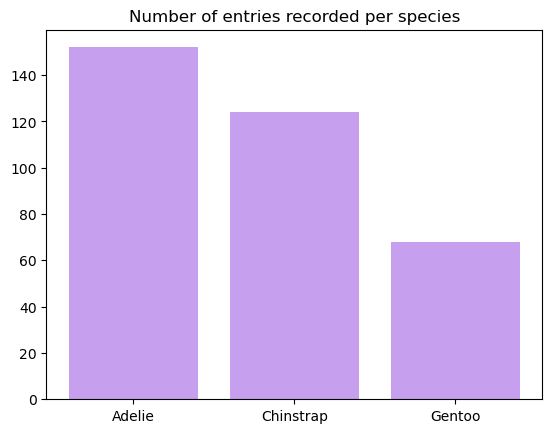

In [128]:
# Plot showing how many entries there are per species in the dataset

species_of_peng = np.array(df['species'].unique()) # setting variable to check the species column and return the unique values in the column
num_of_records = np.array(df['species'].value_counts()) # setting variables to count the number of penguins recorded per species
plt.bar(species_of_peng, num_of_records, color = "xkcd:lavender") #plotting bar chart to show the different species of penguin on the x axis and the number of entries recorded on the y axis
plt.title ("Number of entries recorded per species") # adding title to chart
plt.show() # showing bar chart


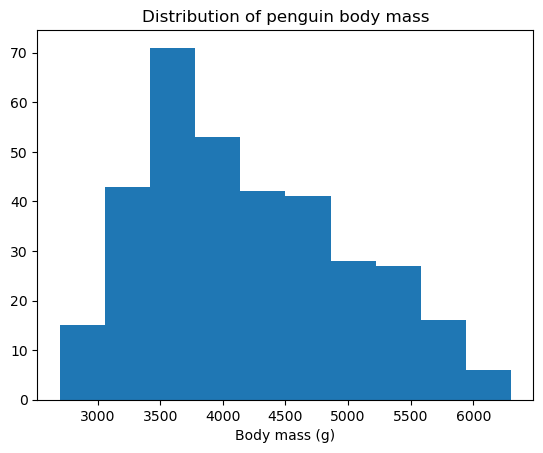

In [129]:
# Plotting a histogram showing the distribution of body mass across the dataset

plt.hist(df["body_mass_g"])
plt.xlabel('Body mass (g)') # setting label for x axis 
plt.title("Distribution of penguin body mass") # setting plot title
plt.show() # showing the plot

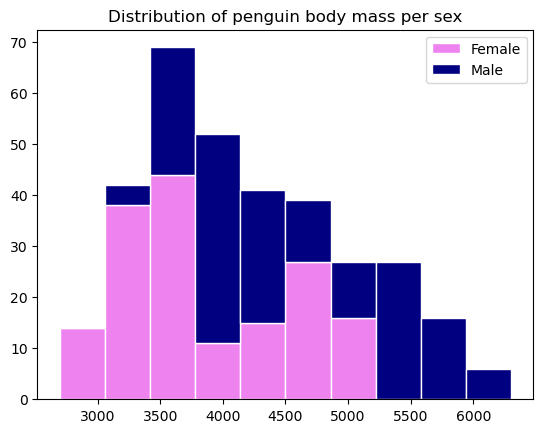

In [130]:
# Plotting a histogram showing the distribution of body mass across the dataset showing the additional context of the distribution of the body mass depending on the sex of the penguin

plt.hist([female_df['body_mass_g'], male_df['body_mass_g']],
    stacked=True,
    label=['Female', 'Male'], edgecolor='white', color=['violet', 'navy'])
plt.title("Distribution of penguin body mass per sex") # setting plot title
plt.legend()
plt.show() # showing the plot

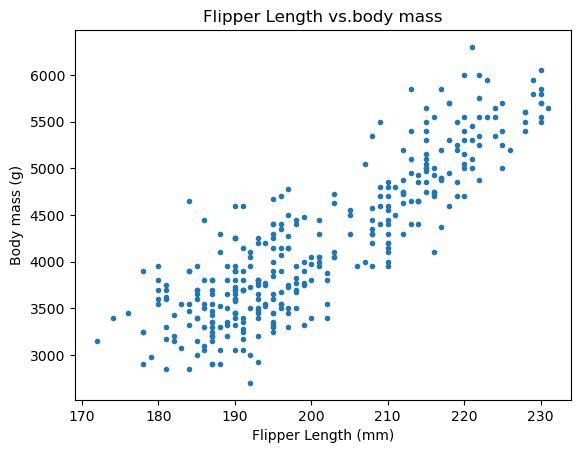

In [131]:
# flipper_length_mm	vs body_mass_g plot

flip_len = df['flipper_length_mm']
body_mass = df['body_mass_g']

# Simple plot
plt.plot(flip_len, body_mass,'.')

# Title & Axis labels
plt.title('Flipper Length vs.body mass')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body mass (g)')

plt.show()

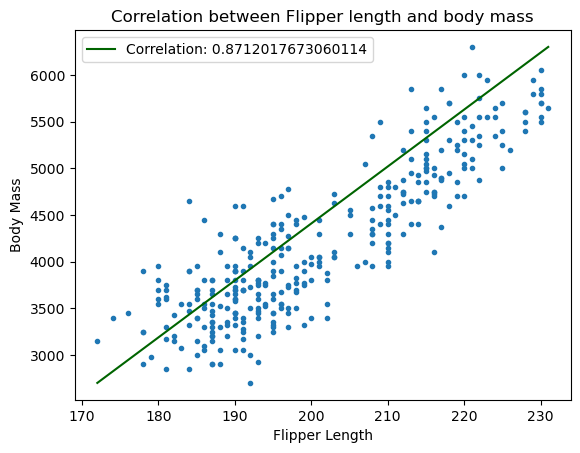

In [132]:
# Calculating the Pearson correlation coefficient between the flipper length and body mass using the .corr function.
correlation = df['flipper_length_mm'].corr(df['body_mass_g'])

# Plotting the data for the individual penguins
plt.plot(df['flipper_length_mm'], df['body_mass_g'], '.')

# Adding a line representing the correlation value
# Plotting the line from the the minimum of both columns and to the maximum
# The label tag is being used to also show the calculation of the corealation on the plot for the users reference
plt.plot([df['flipper_length_mm'].min(), df['flipper_length_mm'].max()],
         [df['body_mass_g'].min(), df['body_mass_g'].max()], 
         color='darkgreen', label=(f'Correlation: {correlation}'))

# Title & Axis labels
plt.title('Correlation between Flipper length and body mass')
plt.xlabel('Flipper Length')
plt.ylabel('Body Mass')

plt.legend()
plt.show()

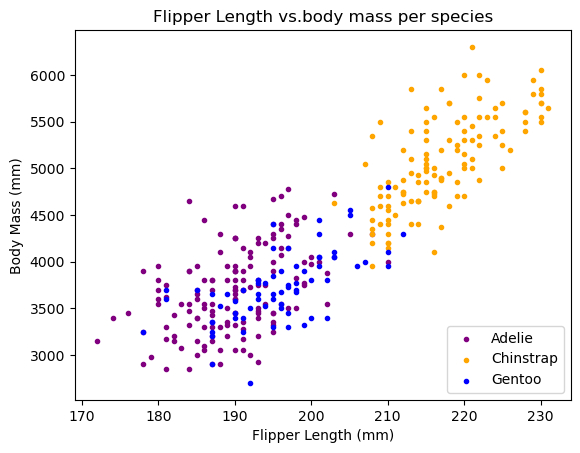

In [133]:
# flipper_length_mm	vs body_mass_g plot colour coded per species

# Get bill length and bill depth for different species of penguins
adelie_flip_len = adelie_data['flipper_length_mm'].to_numpy()
adelie_body_mass = adelie_data['body_mass_g'].to_numpy()

gentoo_flip_len = gentoo_data['flipper_length_mm'].to_numpy()
gentoo_body_mass = gentoo_data['body_mass_g'].to_numpy()

chinstrap_flip_len = chinstrap_data['flipper_length_mm'].to_numpy()
chinstrap_body_mass = chinstrap_data['body_mass_g'].to_numpy()

# Plotting Adelie penguins
plt.scatter(adelie_flip_len, adelie_body_mass, color='PURPLE', label='Adelie', marker = ".")

# Plotting Chinstrap penguins
plt.scatter(gentoo_flip_len, gentoo_body_mass, color='orange', label='Chinstrap', marker = ".")

# Plotting Gentoo penguins
plt.scatter(chinstrap_flip_len, chinstrap_body_mass, color='blue', label='Gentoo', marker = ".")

# Set labels and title
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (mm)')
plt.title('Flipper Length vs.body mass per species')

# Showing legend in bottom right corner
plt.legend(loc = "lower right")
# Show the plot
plt.show()


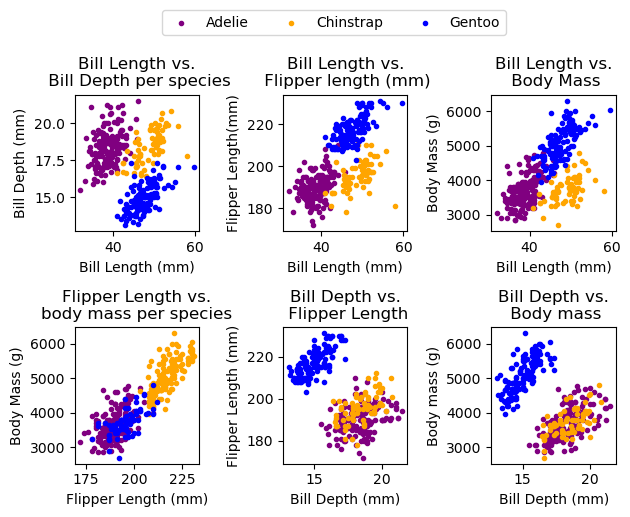

In [134]:
# Setting variables for comparison across the species which will be used for the subplots
adelie_bill_len = adelie_data['bill_length_mm'].to_numpy()
adelie_bill_depth = adelie_data['bill_depth_mm'].to_numpy()
adelie_flip_len = adelie_data['flipper_length_mm'].to_numpy()
adelie_body_mass = adelie_data['body_mass_g'].to_numpy()

gentoo_bill_len = gentoo_data['bill_length_mm'].to_numpy()
gentoo_bill_depth = gentoo_data['bill_depth_mm'].to_numpy()
gentoo_flip_len = gentoo_data['flipper_length_mm'].to_numpy()
gentoo_body_mass = gentoo_data['body_mass_g'].to_numpy()

chinstrap_bill_len = chinstrap_data['bill_length_mm'].to_numpy()
chinstrap_bill_depth = chinstrap_data['bill_depth_mm'].to_numpy()
chinstrap_flip_len = chinstrap_data['flipper_length_mm'].to_numpy()
chinstrap_body_mass = chinstrap_data['body_mass_g'].to_numpy()

plt.subplot(2, 3, 1)  # Creating a subplot for penguins based in Torgersen island
# Plotting the 3 species to the plot 
plt.scatter(adelie_bill_len, adelie_bill_depth, color='PURPLE', label='Adelie', marker = '.')
plt.scatter(chinstrap_bill_len, chinstrap_bill_depth, color='orange', label='Chinstrap', marker='.')
plt.scatter(gentoo_bill_len, gentoo_bill_depth, color='blue', label='Gentoo', marker='.')
# Set labels and title
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.title('Bill Length vs.\n Bill Depth per species')

plt.subplot(2, 3, 2)  # Creating a subplot for bill lenght vs flipper len
plt.scatter(adelie_bill_len, adelie_flip_len, color='PURPLE', marker = '.')
plt.scatter(chinstrap_bill_len, chinstrap_flip_len, color='orange', marker='.')
plt.scatter(gentoo_bill_len, gentoo_flip_len, color='blue', marker='.')
plt.title('Bill Length vs.\n Flipper length (mm)')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Flipper Length(mm)')

plt.subplot(2, 3, 3)  # Creating a subplot for bill lenght vs body mass
plt.scatter(adelie_bill_len, adelie_body_mass, color='PURPLE', marker = '.')
plt.scatter(chinstrap_bill_len, chinstrap_body_mass, color='orange', marker='.')
plt.scatter(gentoo_bill_len, gentoo_body_mass, color='blue', marker='.')
plt.title('Bill Length vs.\n Body Mass')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Body Mass (g)')

plt.subplot(2, 3, 4) # Creating plot for flipper length and body mass
plt.scatter(adelie_flip_len, adelie_body_mass, color='PURPLE', marker = ".")
plt.scatter(gentoo_flip_len, gentoo_body_mass, color='orange', marker = ".")
plt.scatter(chinstrap_flip_len, chinstrap_body_mass, color='blue', marker = ".")
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.title('Flipper Length vs.\nbody mass per species')

plt.subplot(2, 3, 5) # Creating plot bill depth vs flipper len
plt.scatter(adelie_bill_depth, adelie_flip_len, color='PURPLE', marker = '.')
plt.scatter(chinstrap_bill_depth, chinstrap_flip_len, color='orange', marker='.')
plt.scatter(gentoo_bill_depth, gentoo_flip_len, color='blue', marker='.')
plt.title('Bill Depth vs.\n Flipper Length')
plt.xlabel('Bill Depth (mm)')
plt.ylabel('Flipper Length (mm)')

plt.subplot(2, 3, 6) # Creating plot bill depth vs body
plt.scatter(adelie_bill_depth, adelie_body_mass, color='PURPLE', marker = '.')
plt.scatter(chinstrap_bill_depth, chinstrap_body_mass, color='orange', marker='.')
plt.scatter(gentoo_bill_depth, gentoo_body_mass, color='blue', marker='.')
plt.title('Bill Depth vs.\n Body mass')
plt.xlabel('Bill Depth (mm)')
plt.ylabel('Body mass (g)')


plt.tight_layout()  # Adjust the layout of subplots to prevent overlapping
plt.figlegend(loc = "lower left", ncols = 3, bbox_to_anchor=(0.25, 1)) # creating one legend for the subplots and setting it's location to the top center for the plot
plt.show()

### Next actions: Ideas for plots 
- ~~sub plot w/ 6 unique plots:
bill lenght vs bill depth, bill lenght vs flipper len, bill lenght vs body mass, bill depth vs flipper len, bill depth vs body mass, flipper len vs body mass~~
- ~~Check into ways of enhancing the histogram to show split between male and female penguins~~
- ~~Make final decsion for which variables to focus on for project > Body mass vs Flipper length~~
- ~~Part 1 of tidying notebook to remove additional graphy that are not needed~~
- ~~Calculate correlation between body mass & flipper length and plot to graph~~
- Add analysis and commentary to accompany the plots in notebook (i.e. explain types of variables used and why)
- Build README.md file (create sections, add resources used)

***
### End